In [ ]:
# philip walsh
# philipwalsj.ds@gmail.com
# 2019-12-21
# Digit Recognizer from https://www.kaggle.com/c/digit-recognizer/data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
train_data = pd.read_csv("excluded/train.csv")

In [67]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
label_df=train_data[['label']]

In [69]:
train_data.drop('label', axis=1, inplace=True)

In [70]:
label_df['label'].head(4)

0    1
1    0
2    1
3    4
Name: label, dtype: int64

In [71]:
# Get rid of $ and , in the SAL-RATE, then convert it to a float
def char_to_ascii(any_char):
    return ord(str(any_char))

ascii_df = label_df['label'].apply(char_to_ascii)

In [72]:
ascii_df.head(4)

0    49
1    48
2    49
3    52
Name: label, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(train_data, ascii_df, test_size=0.33, random_state=9261774)

In [74]:
X_train.shape,y_train.shape

((28140, 784), (28140,))

In [75]:
X_test.shape, y_test.shape

((13860, 784), (13860,))

In [76]:
### Fit a linear regression model
model_lr = LinearRegression(normalize=False)
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
## score the model
train_score_lm=model_lr.score(X_train, y_train)
print('lm training score     : ', train_score_lm)

lm training score     :  0.6232129880053341


In [78]:
# run the training data through the predict to get the residuals
predicted = pd.DataFrame(model_lr.predict(X_train))
predicted.columns=['digit_guess']
predicted['digit_guess'] = predicted['digit_guess'].astype(int)
#df.a = df.a.astype(float)
expected = y_train

In [79]:
predicted.head(10)

,digit_guess
0,50
1,51
2,52
3,53
4,51
5,54
6,49
7,50
8,48
9,53


In [80]:
expected.head(10)

31310    48
29534    54
21017    53
37647    51
24858    48
29191    52
25997    49
41571    48
3927     48
23135    57
Name: label, dtype: int64

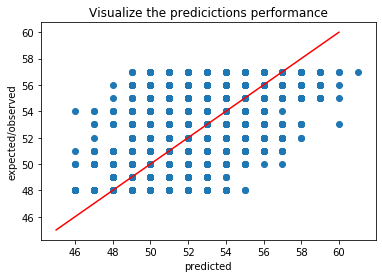

In [81]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([45,60],[45,60], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

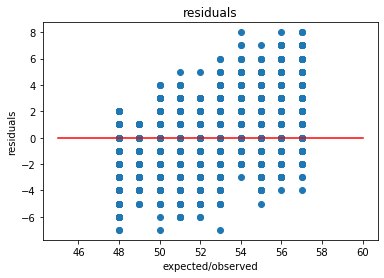

In [82]:
residuals = np.array(expected.values.ravel()) - np.array(predicted.values.ravel())
plt.title('residuals')
plt.xlabel('expected/observed')
plt.ylabel('residuals')
plt.plot([45,60],[0,0], color='red')
plt.scatter(expected, residuals)
# a good residual plot does not have a pattern
# a pattern in the plot means we missed in capturing the data thats driving sale price

In [83]:
# do a preditction on the hold out data
predicted = pd.DataFrame(model_lr.predict(X_test))
predicted.columns=['digit_guess']
predicted['digit_guess'] = predicted['digit_guess'].astype(int)
#df.a = df.a.astype(float)
expected = y_test

In [84]:
predicted.head(10)

,digit_guess
0,52
1,50
2,53
3,51
4,57
5,55
6,53
7,56
8,54
9,49


In [85]:
expected.head(10)

31849    53
34362    49
28860    56
572      50
33572    57
21088    51
25379    55
11002    57
40324    52
39359    51
Name: label, dtype: int64

In [86]:
predicted.to_csv('excluded/lr-test-predicted-test.csv')

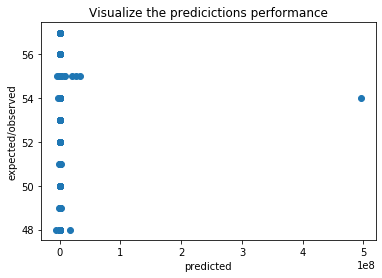

In [87]:
# plot the predicted vs the expected.  
# how well did the model perform
#plt.plot([45, 60], [45, 60], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)